In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline


In [2]:
!head complaints_dec_2014.csv

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1177167,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,
1177166,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,
1177165,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,
1177164,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,
1177163,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhan

In [4]:
consumer_complaints = pd.read_csv('complaints_dec_2014.csv')

In [5]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [11]:
complaint_and_company = consumer_complaints[['Complaint ID', 'Company']]
                    

In [14]:
complaint_and_company

,Complaint ID,Company
0,1177167,Ad Astra Recovery Services Inc
1,1177166,"Unique Management Services, Inc"
2,1177165,"CL Holdings, LLC"
3,1177164,"Enhanced Recovery Company, LLC"
4,1177163,"Enhanced Acquisitions, LLC"
5,1177162,"Credit Systems International, Inc."
6,1177154,Amex
7,1177143,Speedy Cash Holdings
8,1177140,"Afni, Inc."
9,1177139,"Enhanced Recovery Company, LLC"


In [15]:
len(complaint_and_company)

11543

In [53]:
sorted_complaint_and_company = complaint_and_company.sort_values(by='Company')

In [54]:
sorted_complaint_and_company

,Complaint ID,Company
9322,1144671,"(Former)Shapiro, Swertfeger & Hasty, LLP"
5241,1159058,1st Fidelity Loan Servicing
2914,1167570,"1st Priority Mortgage, Inc."
495,1174642,21st Mortgage Corporation
3358,1166067,21st Mortgage Corporation
3278,1165920,21st Mortgage Corporation
34,1177001,21st Mortgage Corporation
392,1175031,21st Mortgage Corporation
2232,1169632,21st Mortgage Corporation
10479,1140555,21st Mortgage Corporation


In [55]:
popped_companies = sorted_complaint_and_company.pop('Company')

In [56]:
popped_companies

9322              (Former)Shapiro, Swertfeger & Hasty, LLP
5241                           1st Fidelity Loan Servicing
2914                           1st Priority Mortgage, Inc.
495                              21st Mortgage Corporation
3358                             21st Mortgage Corporation
3278                             21st Mortgage Corporation
34                               21st Mortgage Corporation
392                              21st Mortgage Corporation
2232                             21st Mortgage Corporation
10479                            21st Mortgage Corporation
6654                             21st Mortgage Corporation
6273                             21st Mortgage Corporation
7474                             21st Mortgage Corporation
10695                            21st Mortgage Corporation
5764                                  2288984 Ontario Inc.
1434                                A.R.M. Solutions, Inc.
5140                                A.R.M. Solutions, In

In [60]:
popped_companies.value_counts().head(10)

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
Name: Company, dtype: int64

(-1.009082208402281, 1.0030240758073674, -1.0069570003506931, 1.0)

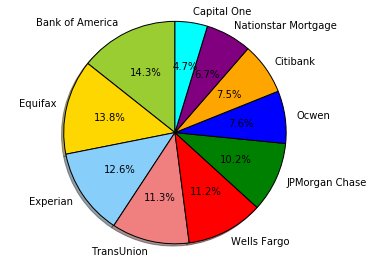

In [64]:
labels = 'Bank of America ', 'Equifax', 'Experian', 'TransUnion', 'Wells Fargo', 'JPMorgan Chase', 'Ocwen', 'Citibank', 'Nationstar Mortgage', 'Capital One'
sizes = [766, 737, 675, 604, 598, 545, 408, 403, 357, 252]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'green', 'blue', 'orange', 'purple', 'aqua']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')